# Tuning hyperparameters and model architecture

> This section will have many models and in each iteration, we will change different parameters

### Importing the libraries

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, utils
from tensorflow import keras
from matplotlib import pyplot as plt

import sys
sys.path.insert(0, '../helpers/')
from plot_graphs import plot_loss, plot_acc

### Setting batch and image size, and importing the datasets 

In [3]:
IMAGE_SIZE = 100
BATCH_SIZE = 32

train = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/train", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
val = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/val", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)
test = utils.image_dataset_from_directory("../datasets/data/split/Zenodo/test", image_size=(IMAGE_SIZE, IMAGE_SIZE), batch_size=BATCH_SIZE)

train = train.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
val = val.prefetch(buffer_size=tf.data.AUTOTUNE).cache()
test = test.prefetch(buffer_size=tf.data.AUTOTUNE).cache()

Found 3840 files belonging to 6 classes.
Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Found 480 files belonging to 6 classes.
Found 480 files belonging to 6 classes.


2022-08-29 01:28:53.902080: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-29 01:28:53.902254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 1. Finding ideal model architecture, dropout rate, and no. of epochs

> Experiment with layers

### Adding more layers than baseline model with larger layer size

In [4]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_1_1 = keras.Model(inputs, outputs)

model_1_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1_1.summary()

history_1_1 = model_1_1.fit(
  train,
  epochs=25,
  validation_data=val
)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 100, 100, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                         

2022-08-29 01:28:58.291947: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-29 01:28:58.292054: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.6876 - accuracy: 0.2883

2022-08-29 01:29:03.947858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 6s 46ms/step - loss: 1.6876 - accuracy: 0.2883 - val_loss: 1.3303 - val_accuracy: 0.5208
Epoch 2/25
120/120 [==============================] - 5s 43ms/step - loss: 1.3415 - accuracy: 0.4667 - val_loss: 1.1628 - val_accuracy: 0.5625
Epoch 3/25
120/120 [==============================] - 5s 42ms/step - loss: 1.1519 - accuracy: 0.5531 - val_loss: 1.0342 - val_accuracy: 0.6104
Epoch 4/25
120/120 [==============================] - 5s 43ms/step - loss: 1.0114 - accuracy: 0.6203 - val_loss: 0.8923 - val_accuracy: 0.6750
Epoch 5/25
120/120 [==============================] - 5s 43ms/step - loss: 0.8836 - accuracy: 0.6685 - val_loss: 0.7515 - val_accuracy: 0.7396
Epoch 6/25
120/120 [==============================] - 5s 42ms/step - loss: 0.7701 - accuracy: 0.7224 - val_loss: 0.6223 - val_accuracy: 0.7854
Epoch 7/25
120/120 [==============================] - 5s 42ms/step - loss: 0.6698 - accuracy: 0.7648 - val_loss: 0.5715 - val_accuracy: 0.8021
Epoch 8/25

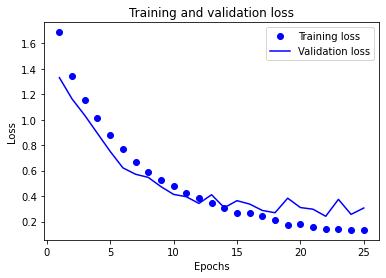

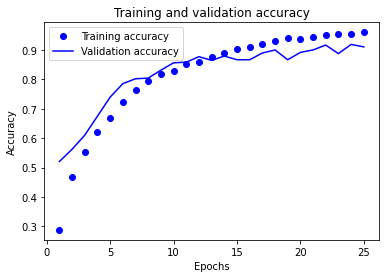

In [5]:
plot_loss(history_1_1)
plot_acc(history_1_1)

### Ideal no. of layers (and layer size) as well as dropout rate and epochs

In [15]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_1_2 = keras.Model(inputs, outputs)

model_1_2.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_1_2.summary()

history_1_2 = model_1_2.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_57 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_58 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 conv2d_59 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                           

2022-08-29 02:02:25.694324: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.8185 - accuracy: 0.1716

2022-08-29 02:02:37.694722: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 13s 97ms/step - loss: 1.8185 - accuracy: 0.1716 - val_loss: 1.7257 - val_accuracy: 0.2979
Epoch 2/30
120/120 [==============================] - 12s 98ms/step - loss: 1.5603 - accuracy: 0.3810 - val_loss: 1.0479 - val_accuracy: 0.5938
Epoch 3/30
120/120 [==============================] - 12s 98ms/step - loss: 0.9994 - accuracy: 0.6346 - val_loss: 0.5859 - val_accuracy: 0.8021
Epoch 4/30
120/120 [==============================] - 12s 99ms/step - loss: 0.6377 - accuracy: 0.7740 - val_loss: 0.4096 - val_accuracy: 0.8583
Epoch 5/30
120/120 [==============================] - 12s 97ms/step - loss: 0.4694 - accuracy: 0.8281 - val_loss: 0.3491 - val_accuracy: 0.8750
Epoch 6/30
120/120 [==============================] - 12s 100ms/step - loss: 0.3449 - accuracy: 0.8766 - val_loss: 0.3096 - val_accuracy: 0.9000
Epoch 7/30
120/120 [==============================] - 12s 99ms/step - loss: 0.2511 - accuracy: 0.9135 - val_loss: 0.4772 - val_accuracy: 0.8667
Ep

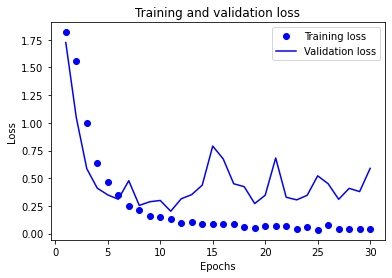

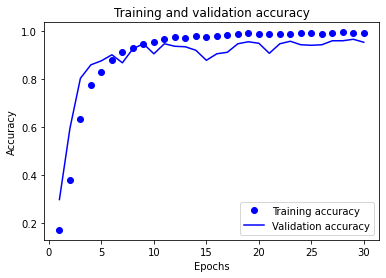

In [16]:
plot_loss(history_1_2)
plot_acc(history_1_2)

## 2. Trying Global Max Pooling and layers.Flatten

> Which last layer to use?

### Maxpooling

In [17]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalMaxPooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_2_1 = keras.Model(inputs, outputs)

model_2_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2_1.summary()

history_2_1 = model_2_1.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_11 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_66 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_67 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 conv2d_68 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                          

2022-08-29 02:12:59.088829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.7943 - accuracy: 0.1555

2022-08-29 02:13:11.330927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 13s 94ms/step - loss: 1.7943 - accuracy: 0.1555 - val_loss: 1.7918 - val_accuracy: 0.1667
Epoch 2/30
120/120 [==============================] - 11s 91ms/step - loss: 1.8069 - accuracy: 0.1797 - val_loss: 1.7908 - val_accuracy: 0.1667
Epoch 3/30
120/120 [==============================] - 11s 92ms/step - loss: 1.6691 - accuracy: 0.3060 - val_loss: 1.1956 - val_accuracy: 0.5688
Epoch 4/30
120/120 [==============================] - 11s 91ms/step - loss: 1.0842 - accuracy: 0.5880 - val_loss: 0.6539 - val_accuracy: 0.7521
Epoch 5/30
120/120 [==============================] - 11s 92ms/step - loss: 0.6770 - accuracy: 0.7565 - val_loss: 0.4578 - val_accuracy: 0.8271
Epoch 6/30
120/120 [==============================] - 11s 94ms/step - loss: 0.4642 - accuracy: 0.8318 - val_loss: 0.3832 - val_accuracy: 0.8729
Epoch 7/30
120/120 [==============================] - 12s 97ms/step - loss: 0.3128 - accuracy: 0.8938 - val_loss: 0.3566 - val_accuracy: 0.8875
Epo

### Flatten

In [18]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_2_2 = keras.Model(inputs, outputs)

model_2_2.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_2_2.summary()

history_2_2 = model_2_2.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_12 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 98, 98, 32)        896       
                                                                 
 conv2d_76 (Conv2D)          (None, 96, 96, 32)        9248      
                                                                 
 conv2d_77 (Conv2D)          (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                          

2022-08-29 02:19:45.836245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.8636 - accuracy: 0.1909

2022-08-29 02:19:59.642267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 15s 110ms/step - loss: 1.8636 - accuracy: 0.1909 - val_loss: 1.7503 - val_accuracy: 0.3417
Epoch 2/30
120/120 [==============================] - 14s 119ms/step - loss: 1.2142 - accuracy: 0.5453 - val_loss: 0.8133 - val_accuracy: 0.7000
Epoch 3/30
120/120 [==============================] - 15s 121ms/step - loss: 0.7119 - accuracy: 0.7391 - val_loss: 0.4855 - val_accuracy: 0.8229
Epoch 4/30
120/120 [==============================] - 15s 122ms/step - loss: 0.4437 - accuracy: 0.8445 - val_loss: 0.3889 - val_accuracy: 0.8479
Epoch 5/30
120/120 [==============================] - 15s 123ms/step - loss: 0.2811 - accuracy: 0.9016 - val_loss: 0.3960 - val_accuracy: 0.8792
Epoch 6/30
120/120 [==============================] - 15s 123ms/step - loss: 0.1879 - accuracy: 0.9383 - val_loss: 0.3437 - val_accuracy: 0.9000
Epoch 7/30
120/120 [==============================] - 15s 123ms/step - loss: 0.1486 - accuracy: 0.9521 - val_loss: 0.4034 - val_accuracy: 0.9

## 3. Regularizing the model and testing different learning rates

> Regularizer and different learning rates

In [24]:
# adding l2 regularization
# regularizer = keras.regularizers.L2(0.00004)
# regularizer = keras.regularizers.l1_l2(0.00004)
regularizer = keras.regularizers.L2(0.00004)

inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dense(256, kernel_regularizer=regularizer, activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model_3_1 = keras.Model(inputs, outputs)

model_3_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_3_1.summary()

history_3_1 = model_3_1.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_18 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_129 (Conv2D)         (None, 98, 98, 32)        896       
                                                                 
 conv2d_130 (Conv2D)         (None, 96, 96, 32)        9248      
                                                                 
 conv2d_131 (Conv2D)         (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_59 (MaxPoolin  (None, 47, 47, 32)       0         
 g2D)                                                            
                                                          

2022-08-29 02:41:14.606606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.8071 - accuracy: 0.1732

2022-08-29 02:41:27.367319: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 14s 99ms/step - loss: 1.8071 - accuracy: 0.1732 - val_loss: 1.7936 - val_accuracy: 0.1667
Epoch 2/30
120/120 [==============================] - 11s 94ms/step - loss: 1.7884 - accuracy: 0.2029 - val_loss: 1.7842 - val_accuracy: 0.1667
Epoch 3/30
120/120 [==============================] - 11s 93ms/step - loss: 1.5900 - accuracy: 0.3646 - val_loss: 0.9973 - val_accuracy: 0.6542
Epoch 4/30
120/120 [==============================] - 11s 95ms/step - loss: 1.0763 - accuracy: 0.6216 - val_loss: 0.7668 - val_accuracy: 0.7271
Epoch 5/30
120/120 [==============================] - 12s 97ms/step - loss: 0.6778 - accuracy: 0.7651 - val_loss: 0.5766 - val_accuracy: 0.8229
Epoch 6/30
120/120 [==============================] - 12s 100ms/step - loss: 0.4874 - accuracy: 0.8268 - val_loss: 0.3824 - val_accuracy: 0.8625
Epoch 7/30
120/120 [==============================] - 12s 101ms/step - loss: 0.3522 - accuracy: 0.8867 - val_loss: 0.3025 - val_accuracy: 0.8917
E

## 4. Adding residuals

> Residuals

In [53]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
regularizer = keras.regularizers.L2(0.00004)

x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
  residual = x
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  x = layers.Conv2D(size, 3, padding="same", use_bias=False, kernel_regularizer=regularizer)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  x = layers.Conv2D(size, 3, padding="same", use_bias=False)(x)
  x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
  residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
  x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_4_1 = keras.Model(inputs, outputs)

model_4_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_4_1.summary()

Model: "model_33"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_31 (Rescaling)       (None, 100, 100, 3)  0           ['input_35[0][0]']               
                                                                                                  
 conv2d_249 (Conv2D)            (None, 98, 98, 32)   864         ['rescaling_31[0][0]']           
                                                                                                  
 batch_normalization_24 (BatchN  (None, 98, 98, 32)  128         ['conv2d_249[0][0]']      

In [54]:
history_4_1 = model_4_1.fit(
  train,
  epochs=30,
  validation_data=val
)

Epoch 1/30


2022-08-29 05:37:44.882674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 6.9660 - accuracy: 0.3336

2022-08-29 05:38:13.100071: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 30s 208ms/step - loss: 6.9660 - accuracy: 0.3336 - val_loss: 4.6550 - val_accuracy: 0.1667
Epoch 2/30
120/120 [==============================] - 25s 204ms/step - loss: 2.0950 - accuracy: 0.4987 - val_loss: 7.0950 - val_accuracy: 0.1833
Epoch 3/30
120/120 [==============================] - 25s 211ms/step - loss: 1.1525 - accuracy: 0.6669 - val_loss: 2.1183 - val_accuracy: 0.4313
Epoch 4/30
120/120 [==============================] - 26s 216ms/step - loss: 0.7136 - accuracy: 0.7797 - val_loss: 0.9841 - val_accuracy: 0.6771
Epoch 5/30
120/120 [==============================] - 26s 220ms/step - loss: 0.4613 - accuracy: 0.8487 - val_loss: 0.5663 - val_accuracy: 0.8313
Epoch 6/30
120/120 [==============================] - 27s 225ms/step - loss: 0.3278 - accuracy: 0.8966 - val_loss: 10.0095 - val_accuracy: 0.4354
Epoch 7/30
120/120 [==============================] - 27s 226ms/step - loss: 0.2629 - accuracy: 0.9177 - val_loss: 0.9413 - val_accuracy: 0.

## 5. Experimenting with data augmentation

> data augmentation

In [25]:
# Using this method for M1 Mac CPU acces to run augmentation
with tf.device('/cpu:0'):
  data_augmentation = keras.Sequential(
  [
      layers.RandomFlip("horizontal"),
      layers.RandomRotation(0.1),
      layers.RandomZoom(0.2),
      layers.RandomContrast(0.2),
      layers.RandomTranslation(height_factor=0.2,width_factor=0.3)
  ] 
  )

In [30]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
with tf.device('/cpu:0'):
  x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)

x = layers.Dropout(0.5)(x)

outputs = layers.Dense(6, activation='softmax')(x)

model_5_1 = keras.Model(inputs, outputs)

model_5_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5_1.summary()

history_5_1 = model_5_1.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 100, 100, 3)       0         
                                                                 
 rescaling_23 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_174 (Conv2D)         (None, 98, 98, 32)        896       
                                                                 
 conv2d_175 (Conv2D)         (None, 96, 96, 32)        9248      
                                                                 
 conv2d_176 (Conv2D)         (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_74 (MaxPoolin  (None, 47, 47, 32)       0  

2022-08-29 03:28:26.276497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.7965 - accuracy: 0.1646

2022-08-29 03:28:42.678326: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 18s 128ms/step - loss: 1.7965 - accuracy: 0.1646 - val_loss: 1.7916 - val_accuracy: 0.1667
Epoch 2/30
120/120 [==============================] - 16s 131ms/step - loss: 1.8456 - accuracy: 0.1865 - val_loss: 1.7169 - val_accuracy: 0.2646
Epoch 3/30
120/120 [==============================] - 17s 138ms/step - loss: 1.6755 - accuracy: 0.3221 - val_loss: 1.4007 - val_accuracy: 0.4188
Epoch 4/30
120/120 [==============================] - 16s 134ms/step - loss: 1.3497 - accuracy: 0.4560 - val_loss: 1.0895 - val_accuracy: 0.5417
Epoch 5/30
120/120 [==============================] - 16s 132ms/step - loss: 1.1588 - accuracy: 0.5474 - val_loss: 0.9553 - val_accuracy: 0.6250
Epoch 6/30
120/120 [==============================] - 16s 132ms/step - loss: 0.9877 - accuracy: 0.6242 - val_loss: 0.8074 - val_accuracy: 0.7104
Epoch 7/30
120/120 [==============================] - 16s 131ms/step - loss: 0.8530 - accuracy: 0.6750 - val_loss: 0.8520 - val_accuracy: 0.6

KeyboardInterrupt: 

## 6. Experimenting with image processing

> Image processing

In [58]:
# Creating new modified train, test and val datasets after applying image processing

def process_image(x):
  x = tf.image.adjust_brightness(x, 0.8)
  x = tf.image.adjust_contrast(x, 3)
  x = tf.image.adjust_saturation(x, 2)
  return x

def process_ds(dataset):
  return dataset.map(lambda x, y: (process_image(x), y)).prefetch(tf.data.AUTOTUNE).cache()
  
train_processed = process_ds(train)
val_processed = process_ds(val)
test_processed = process_ds(test)

# train_modified = train.map(lambda x, y: (
#   tf.image.adjust_saturation(
#     tf.image.adjust_contrast(tf.image.adjust_brightness(x, 0.8), 3), 2) , y)
#     ).prefetch(tf.data.AUTOTUNE).cache()
  
# val_modified = val.map(lambda x, y: (
#   tf.image.adjust_saturation(
#     tf.image.adjust_contrast(tf.image.adjust_brightness(x, 0.8), 3), 2) , y)
#     ).prefetch(tf.data.AUTOTUNE).cache()
    
# test_modified = test.map(lambda x, y: (
#   tf.image.adjust_saturation(
#     tf.image.adjust_contrast(tf.image.adjust_brightness(x, 0.8), 3), 2) , y)
#     ).prefetch(tf.data.AUTOTUNE).cache()

In [59]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_6_1 = keras.Model(inputs, outputs)

model_6_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_6_1.summary()

history_6_1 = model_6_1.fit(
  train_processed,
  epochs=30,
  validation_data=val_processed
)

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_36 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_32 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_265 (Conv2D)         (None, 98, 98, 32)        896       
                                                                 
 conv2d_266 (Conv2D)         (None, 96, 96, 32)        9248      
                                                                 
 conv2d_267 (Conv2D)         (None, 94, 94, 32)        9248      
                                                                 
 max_pooling2d_115 (MaxPooli  (None, 47, 47, 32)       0         
 ng2D)                                                           
                                                          

2022-08-29 07:56:57.639266: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 1.7217 - accuracy: 0.2688

2022-08-29 07:57:11.138285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 15s 98ms/step - loss: 1.7217 - accuracy: 0.2688 - val_loss: 1.4501 - val_accuracy: 0.5750
Epoch 2/30
120/120 [==============================] - 11s 91ms/step - loss: 0.9982 - accuracy: 0.6148 - val_loss: 0.6236 - val_accuracy: 0.7688
Epoch 3/30
120/120 [==============================] - 11s 94ms/step - loss: 0.6834 - accuracy: 0.7677 - val_loss: 0.4170 - val_accuracy: 0.8417
Epoch 4/30
120/120 [==============================] - 11s 91ms/step - loss: 0.4327 - accuracy: 0.8596 - val_loss: 0.3617 - val_accuracy: 0.8708
Epoch 5/30
120/120 [==============================] - 11s 93ms/step - loss: 0.3226 - accuracy: 0.8917 - val_loss: 0.3247 - val_accuracy: 0.9063
Epoch 6/30
120/120 [==============================] - 11s 90ms/step - loss: 0.2289 - accuracy: 0.9229 - val_loss: 0.2872 - val_accuracy: 0.9104
Epoch 7/30
120/120 [==============================] - 11s 91ms/step - loss: 0.1897 - accuracy: 0.9388 - val_loss: 0.3325 - val_accuracy: 0.9063
Epo

### Trying processed images on residuals model

In [60]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Rescaling(1./255)(x)
regularizer = keras.regularizers.L2(0.00004)

x = layers.Conv2D(filters=32, kernel_size=3, use_bias=False)(x)

for size in [32, 64, 128, 256, 512]:
  residual = x
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  x = layers.Conv2D(size, 3, padding="same", use_bias=False, kernel_regularizer=regularizer)(x)
  x = layers.BatchNormalization()(x)
  x = layers.Activation("relu")(x)
  x = layers.Conv2D(size, 3, padding="same", use_bias=False, kernel_regularizer=regularizer)(x)
  x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
  residual = layers.Conv2D(size, 1, strides=2, padding="same", use_bias=False)(residual)
  x = layers.add([x, residual])

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_6_2 = keras.Model(inputs, outputs)

model_6_2.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_6_2.summary()

history_6_2 = model_6_2.fit(
  train_processed,
  epochs=30,
  validation_data=val_processed
)

Model: "model_35"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_33 (Rescaling)       (None, 100, 100, 3)  0           ['input_37[0][0]']               
                                                                                                  
 conv2d_274 (Conv2D)            (None, 98, 98, 32)   864         ['rescaling_33[0][0]']           
                                                                                                  
 batch_normalization_34 (BatchN  (None, 98, 98, 32)  128         ['conv2d_274[0][0]']      

2022-08-29 08:03:38.583418: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 6.4994 - accuracy: 0.3477

2022-08-29 08:04:08.693380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 33s 225ms/step - loss: 6.4994 - accuracy: 0.3477 - val_loss: 3.9369 - val_accuracy: 0.1688
Epoch 2/30
120/120 [==============================] - 28s 231ms/step - loss: 2.0185 - accuracy: 0.5344 - val_loss: 1.9942 - val_accuracy: 0.4208
Epoch 3/30
120/120 [==============================] - 29s 239ms/step - loss: 1.2304 - accuracy: 0.6880 - val_loss: 2.8316 - val_accuracy: 0.4667
Epoch 4/30
120/120 [==============================] - 29s 243ms/step - loss: 0.7974 - accuracy: 0.7826 - val_loss: 2.4521 - val_accuracy: 0.4958
Epoch 5/30
120/120 [==============================] - 29s 242ms/step - loss: 0.7184 - accuracy: 0.8333 - val_loss: 1.2695 - val_accuracy: 0.6750
Epoch 6/30
120/120 [==============================] - 32s 267ms/step - loss: 0.4805 - accuracy: 0.8831 - val_loss: 2.2955 - val_accuracy: 0.5813
Epoch 7/30
120/120 [==============================] - 37s 308ms/step - loss: 0.3549 - accuracy: 0.9102 - val_loss: 5.5485 - val_accuracy: 0.5

## 7. Efficient model - highest possible accuracy with lowest possible size

In [45]:
inputs = keras.Input(shape=(100, 100, 3))
x = inputs
x = layers.Conv2D(16, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(6, activation='softmax')(x)

model_7_1 = keras.Model(inputs, outputs)

model_7_1.compile(optimizer=keras.optimizers.RMSprop(0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_7_1.summary()

history_7_1 = model_7_1.fit(
  train,
  epochs=30,
  validation_data=val
)

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_31 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_222 (Conv2D)         (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_95 (MaxPoolin  (None, 49, 49, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_223 (Conv2D)         (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_96 (MaxPoolin  (None, 23, 23, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_224 (Conv2D)         (None, 21, 21, 32)        924

2022-08-29 04:11:59.983649: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - ETA: 0s - loss: 2.5547 - accuracy: 0.1701

2022-08-29 04:12:04.683507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


120/120 [==============================] - 5s 30ms/step - loss: 2.5547 - accuracy: 0.1701 - val_loss: 1.7908 - val_accuracy: 0.1583
Epoch 2/40
120/120 [==============================] - 3s 25ms/step - loss: 1.8237 - accuracy: 0.1667 - val_loss: 1.7919 - val_accuracy: 0.1667
Epoch 3/40
120/120 [==============================] - 3s 24ms/step - loss: 1.8234 - accuracy: 0.1635 - val_loss: 1.7918 - val_accuracy: 0.1688
Epoch 4/40
120/120 [==============================] - 3s 25ms/step - loss: 1.8124 - accuracy: 0.1708 - val_loss: 1.7913 - val_accuracy: 0.1750
Epoch 5/40
120/120 [==============================] - 3s 25ms/step - loss: 1.8559 - accuracy: 0.2096 - val_loss: 1.7436 - val_accuracy: 0.2833
Epoch 6/40
120/120 [==============================] - 3s 26ms/step - loss: 1.7391 - accuracy: 0.2763 - val_loss: 1.5791 - val_accuracy: 0.3521
Epoch 7/40
120/120 [==============================] - 3s 26ms/step - loss: 1.5024 - accuracy: 0.3865 - val_loss: 1.1283 - val_accuracy: 0.5479
Epoch 8/40